In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CommonModules.LoadMagneticField import read
from CommonModules.BiSplineDer import UniBiSpline
from CommonModules.BiSplineDer import BiSpline
from CommonModules.PlasmaEquilibrium import IntSample, StixParamSample
from CommonModules.PlasmaEquilibrium import TokamakEquilibrium
from CommonModules.input_data import InputData
from Tools.PlotData.CommonPlotting import plotting_functions

    

In [2]:
configfile = '/home/devlamin/WKbeam_simulations/TCV_86148_0.6_fluct/RayTracing.txt'
idata = InputData(configfile)
Eq = TokamakEquilibrium(idata)

In [44]:
nptR=500
nptZ=500

Rmin = Eq.Rgrid[0,0] 
Rmax = Eq.Rgrid[-1,0] 
Zmin = Eq.zgrid[0,0] 
Zmax = Eq.zgrid[0,-1]

R = np.linspace(Rmin, Rmax, nptR)
z = np.linspace(Zmin, Zmax, nptZ)

Rm = R / 100. # converted from cm to m
Zm = z / 100. # converted from cm to m

RR, ZZ = np.meshgrid(R, z, indexing='ij')
    
    # Cyclotron and plasma frequency
StixX, StixY, field_and_density = StixParamSample(R, z, Eq, idata.freq)
Bt2d, BR2d, Bz2d, Ne2d = field_and_density
Te2d = IntSample(R, z, Eq.TeInt.eval)
Raxis, Zaxis = Eq.magn_axis_coord_Rz

B_p = np.sqrt(BR2d**2 + Bz2d**2)
q = np.sqrt((RR - Raxis)**2 + (ZZ - Zaxis)**2)*Bt2d / (RR*B_p)

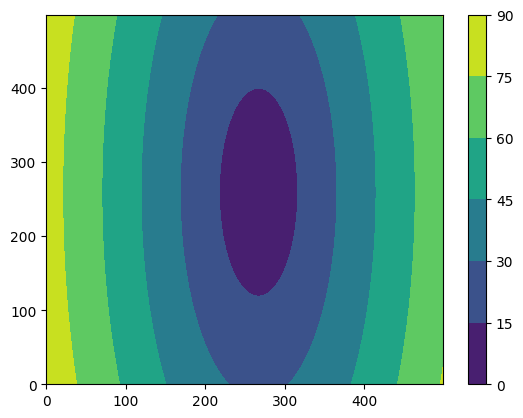

In [43]:
plt.contourf(np.sqrt((RR - Raxis)**2 + (ZZ - Zaxis)**2))
plt.colorbar()

In [4]:
StixX.shape


(500, 500)

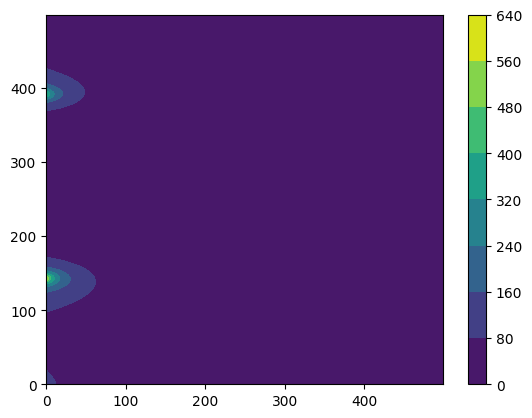

In [49]:
plt.contourf(abs(q))
plt.colorbar()



In [5]:
psi = IntSample(R, z, Eq.PsiInt.eval)

Text(0.5, 1.0, '$q$')

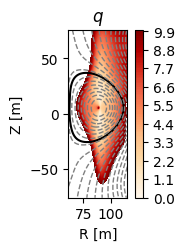

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Mask q values outside [0, 10]
q_masked = np.ma.masked_outside(np.abs(q), 0, 10)

plot_Bp = plt.subplot(2,3,3)
plot_Bp.set_aspect('equal')

Bp_grid = plot_Bp.contourf(
    R, z, q_masked,
    levels=100, cmap='OrRd', vmin=0, vmax=10
)

plot_Bp.contour(R, z, psi, [1], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20),
                colors='grey', linestyles='dashed', linewidths=1)

# Set "bad" (masked) values to white
Bp_grid.cmap.set_bad(color='white')

plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$q$')



Apparently it's already stored in rho, not in psi!

<>:23: DeprecationWarning: invalid escape sequence '\o'
<>:23: DeprecationWarning: invalid escape sequence '\o'
/tmp/ipykernel_531546/985036113.py:23: DeprecationWarning: invalid escape sequence '\o'
  """


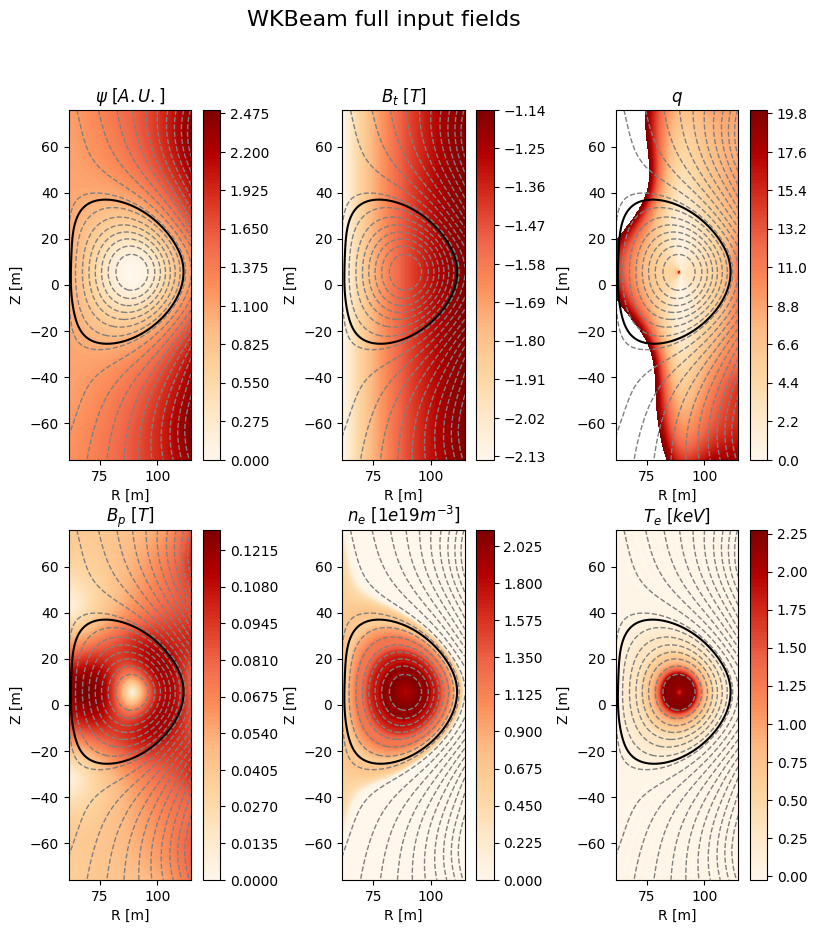

In [53]:
plt.figure(figsize=(10,10))
plt.suptitle(r'WKBeam full input fields', fontsize=16)

plot_psi = plt.subplot(2,3,1)
plot_psi.set_aspect('equal')
psi_grid =plot_psi.contourf(R, z, psi, levels=100, cmap='OrRd')
plot_psi.contour(R, z, psi, [1], colors='black')
plot_psi.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(psi_grid)
plot_psi.set_xlabel('R [m]')
plot_psi.set_ylabel('Z [m]')
plot_psi.set_title(r'$\psi\ [A.U.]$')

plot_Bt = plt.subplot(2,3,2)
plot_Bt.set_aspect('equal')
Bt_grid = plot_Bt.contourf(R, z, Bt2d, levels=100, cmap='OrRd')
plot_Bt.contour(R, z, psi, [1], colors='black')
plot_Bt.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Bt_grid)
plot_Bt.set_xlabel('R [m]')
plot_Bt.set_ylabel('Z [m]')
plot_Bt.set_title(r'$B_t\ [T]$')
"""
plot_S = plt.subplot(2,3,3)
plot_S.set_aspect('equal')
c_Y = plot_S.contourf(R, z, StixY, 100, cmap='OrRd')
plt.colorbar(c_Y, ax=plot_S, format="%1.2f")
plotting_functions.add_cyclotron_resonances(R, z, StixY, plot_S)
plot_S.set_title(r'$\omega_{c \mathrm{e}}/\omega$')
h1, h2, h3 = plotting_functions.add_cyclotron_resonances(R, z, StixY, plot_S)
O_cutoff = plotting_functions.add_Omode_cutoff(R, z, StixX, plot_S)
X_cutoff = plotting_functions.add_Xmode_cutoff(R, z, StixX, StixY, plot_S)
UH_res = plotting_functions.add_UHresonance(R, z, StixX, StixY, plot_S)
plot_S.contour(R, z, psi, [1], colors='black')
plot_S.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plot_S.set_xlabel('R [m]')
plot_S.set_ylabel('Z [m]')
"""


q_masked = np.ma.masked_outside(np.abs(q), 0, 20)

plot_Bp = plt.subplot(2,3,3)
plot_Bp.set_aspect('equal')

Bp_grid = plot_Bp.contourf(
    R, z, q_masked,
    levels=100, cmap='OrRd', vmin=0, vmax=20
)

plot_Bp.contour(R, z, psi, [1], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20),
                colors='grey', linestyles='dashed', linewidths=1)

# Set "bad" (masked) values to white
#Bp_grid.cmap.set_bad(color='white')

plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$q$')


plot_Bp = plt.subplot(2,3,4)
plot_Bp.set_aspect('equal')
Bp_grid = plot_Bp.contourf(R, z, B_p, levels=100, cmap='OrRd')
plot_Bp.contour(R, z, psi, [1], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$B_p\ [T]$')



plot_ne = plt.subplot(2,3,5)
plot_ne.set_aspect('equal')
ne_grid = plot_ne.contourf(R, z, Ne2d, levels=100, cmap='OrRd')
plot_ne.contour(R, z, psi, [1], colors='black')
plot_ne.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(ne_grid)
plot_ne.set_xlabel('R [m]')
plot_ne.set_ylabel('Z [m]')
plot_ne.set_title(r'$n_e\ [1e19 m^{-3}]$')

plot_Te = plt.subplot(2,3,6)
plot_Te.set_aspect('equal')
Te_grid = plot_Te.contourf(R, z, Te2d, levels=100, cmap='OrRd')
plot_Te.contour(R, z, psi, [1], colors='black')
plot_Te.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Te_grid)
plot_Te.set_xlabel('R [m]')
plot_Te.set_ylabel('Z [m]')
plot_Te.set_title(r'$T_e\ [keV]$')

plt.savefig('WKBeam_input_fields.pdf', dpi=300)
plt.show()

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import h5py
from scipy.io import loadmat
from Tools.PlotData.PlotVessel.plotVessel import plotVessel


vesselfile = '/home/devlamin/WKbeam_simulations/TCV_85352_0.9_fluct/input/85352_vessel.mat'

vesseldata  = loadmat(vesselfile)['vesselcont']